# COMS21202: Symbols, Patterns and Signals #
# Lab 3: Least Square Method #

---
Tip: You will need to refer to the help pages to complete most of these examples.
Tip: There is slight difference between `np.array` and `np.matrix` especially when it comes to operations on those. If you're not shure what type is given object try `print( type(x) )`.

To start with, run the code cell below to import  needed libraries.

In [2]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers ##
**a) **Generate a sequence of 10 numbers ${y_i}$, $1\leq i\leq 10$, using the following equation
$$
y_i=0.2+0.5x_i+e_i
$$
where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $N(0,0.1)$ indicating a normally-distributed error in the measurement.

In [3]:
x = np.random.rand(10)
e = 0.1 * np.random.randn(10)
y = 0.2 + 0.5*x + e
print(y)

[ 0.57445687  0.38281231  0.57069562  0.50267124  0.34206089  0.42678002
  0.16157759  0.52493325  0.14132209  0.76642888]


**b) **Generate a scatter plot of $x_i, y_i$.

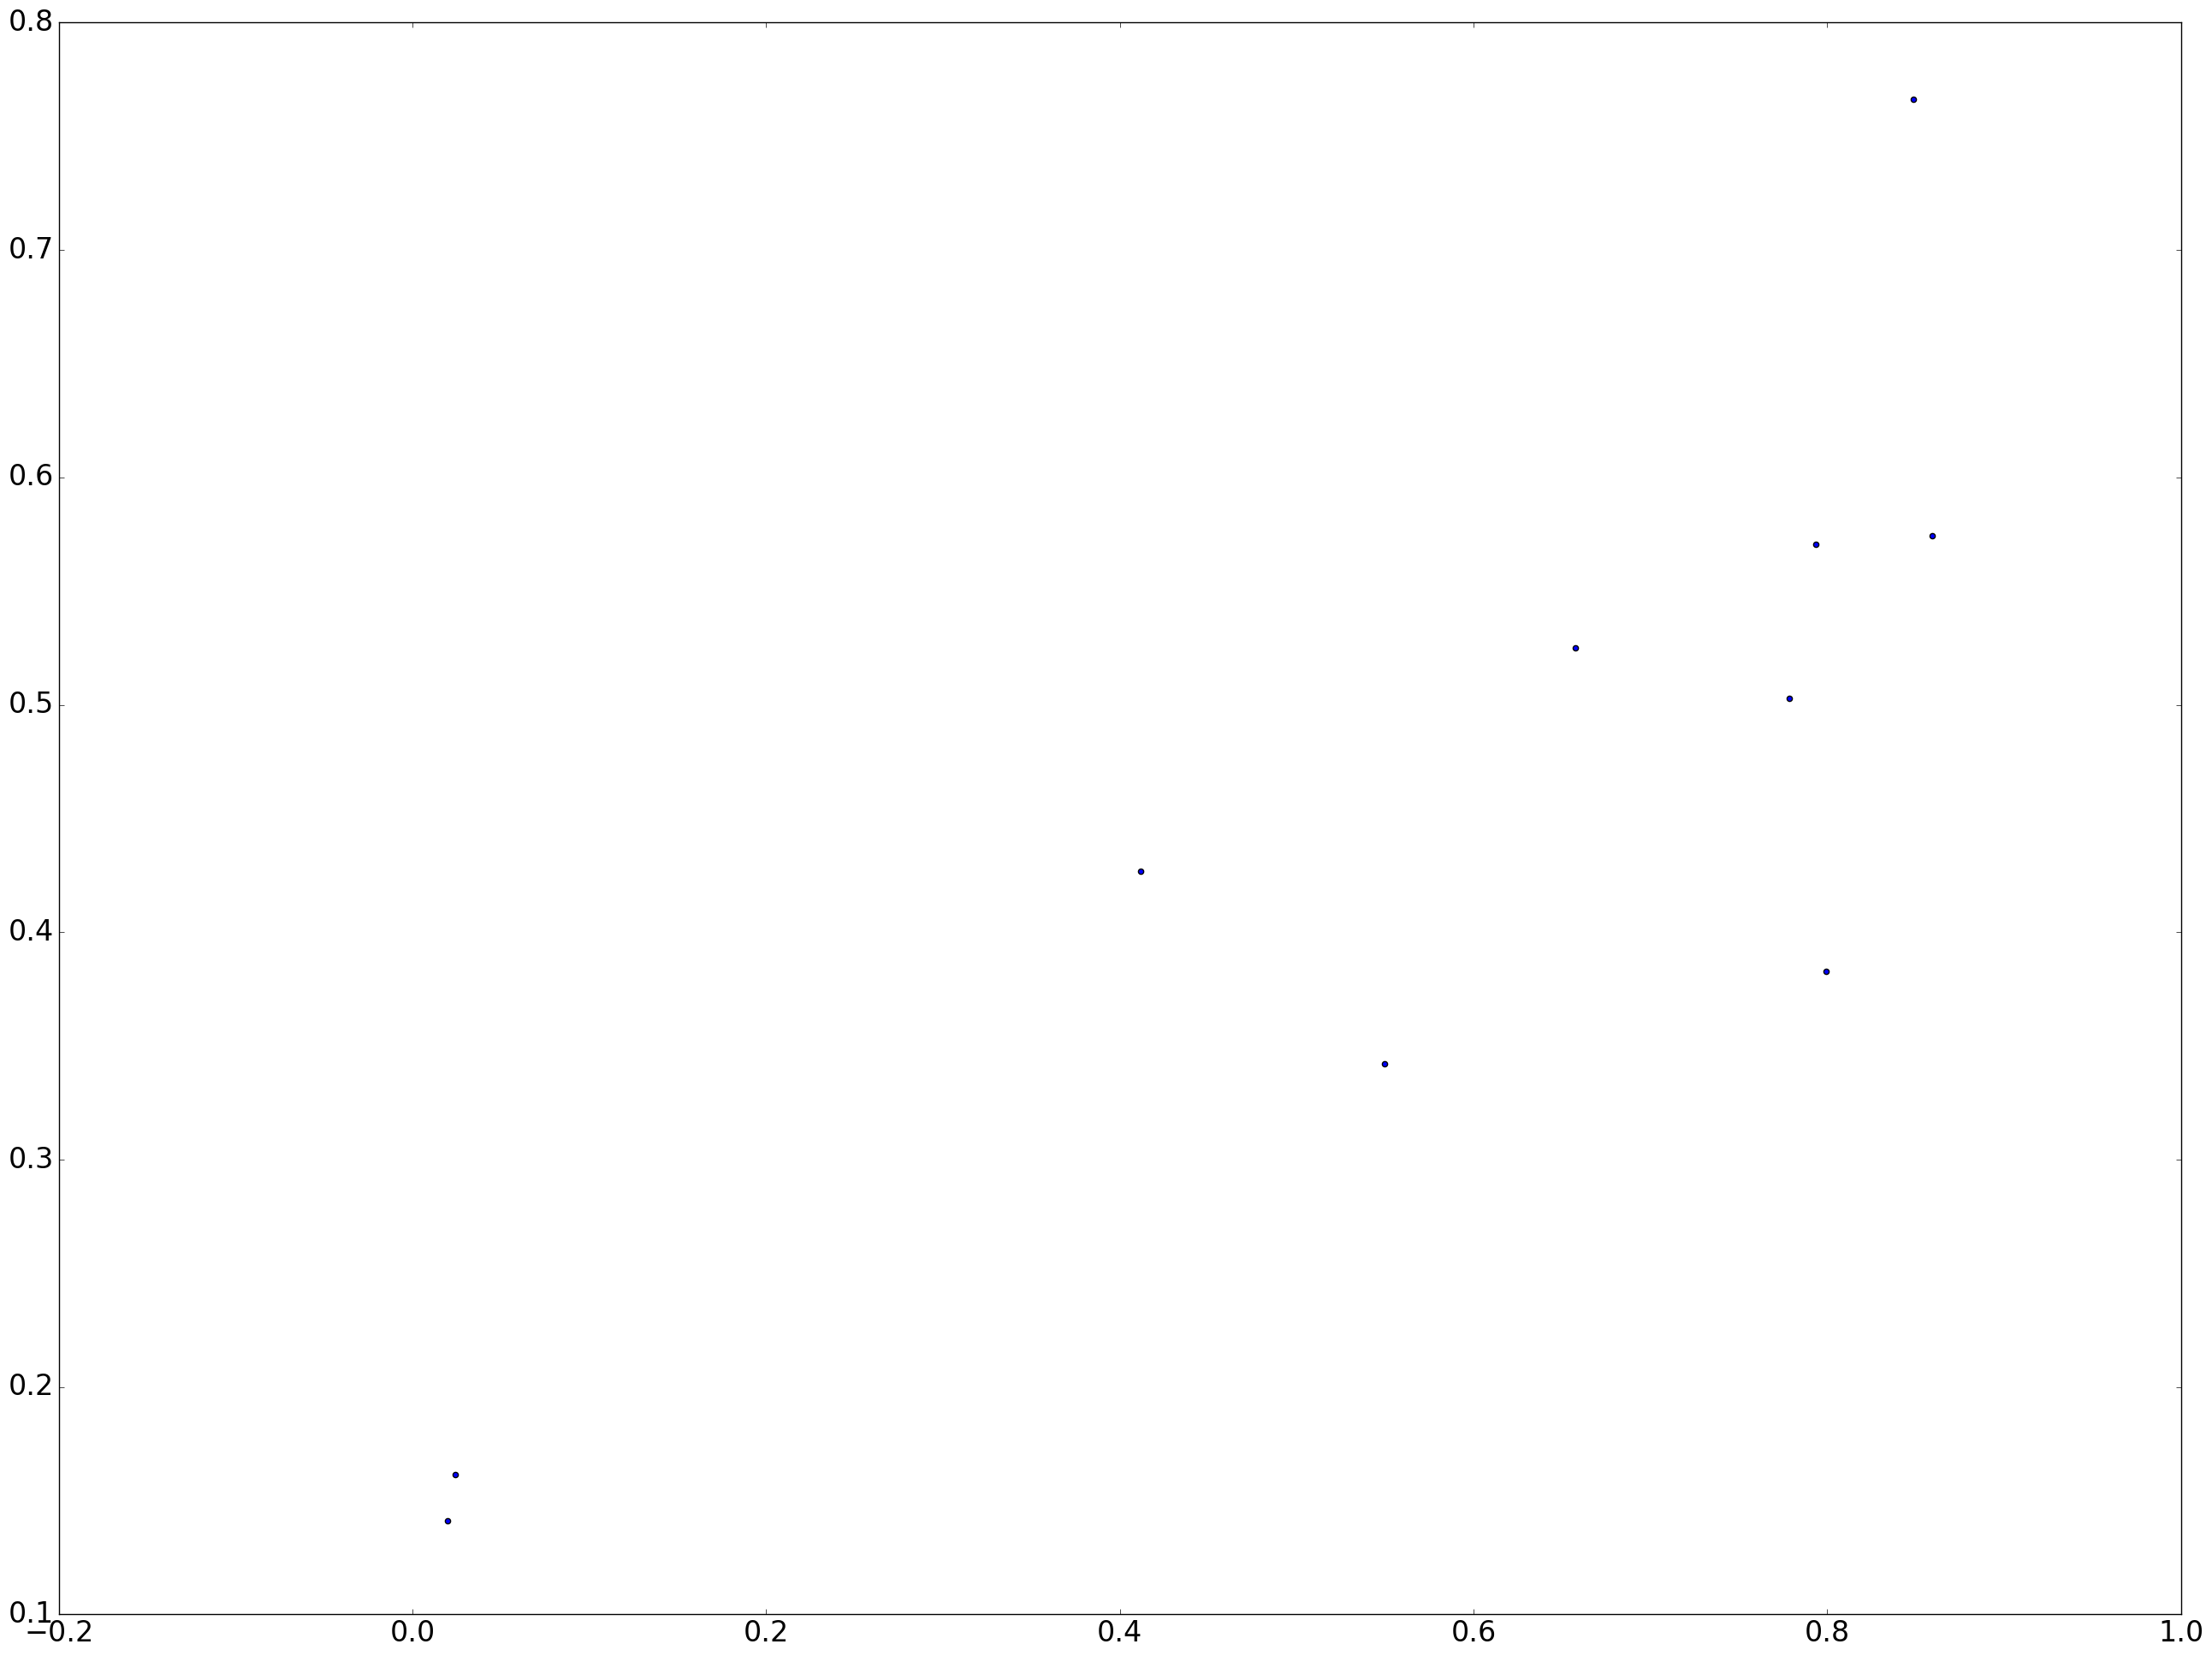

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

## 2. Create a general function ##
Change the above code to a function that receives the parameters $m$, $c$ and $n$ for the equation $y_i = c + m x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  
Use the code to generate a 100 samples from the equation above and scatter plot the new sample.

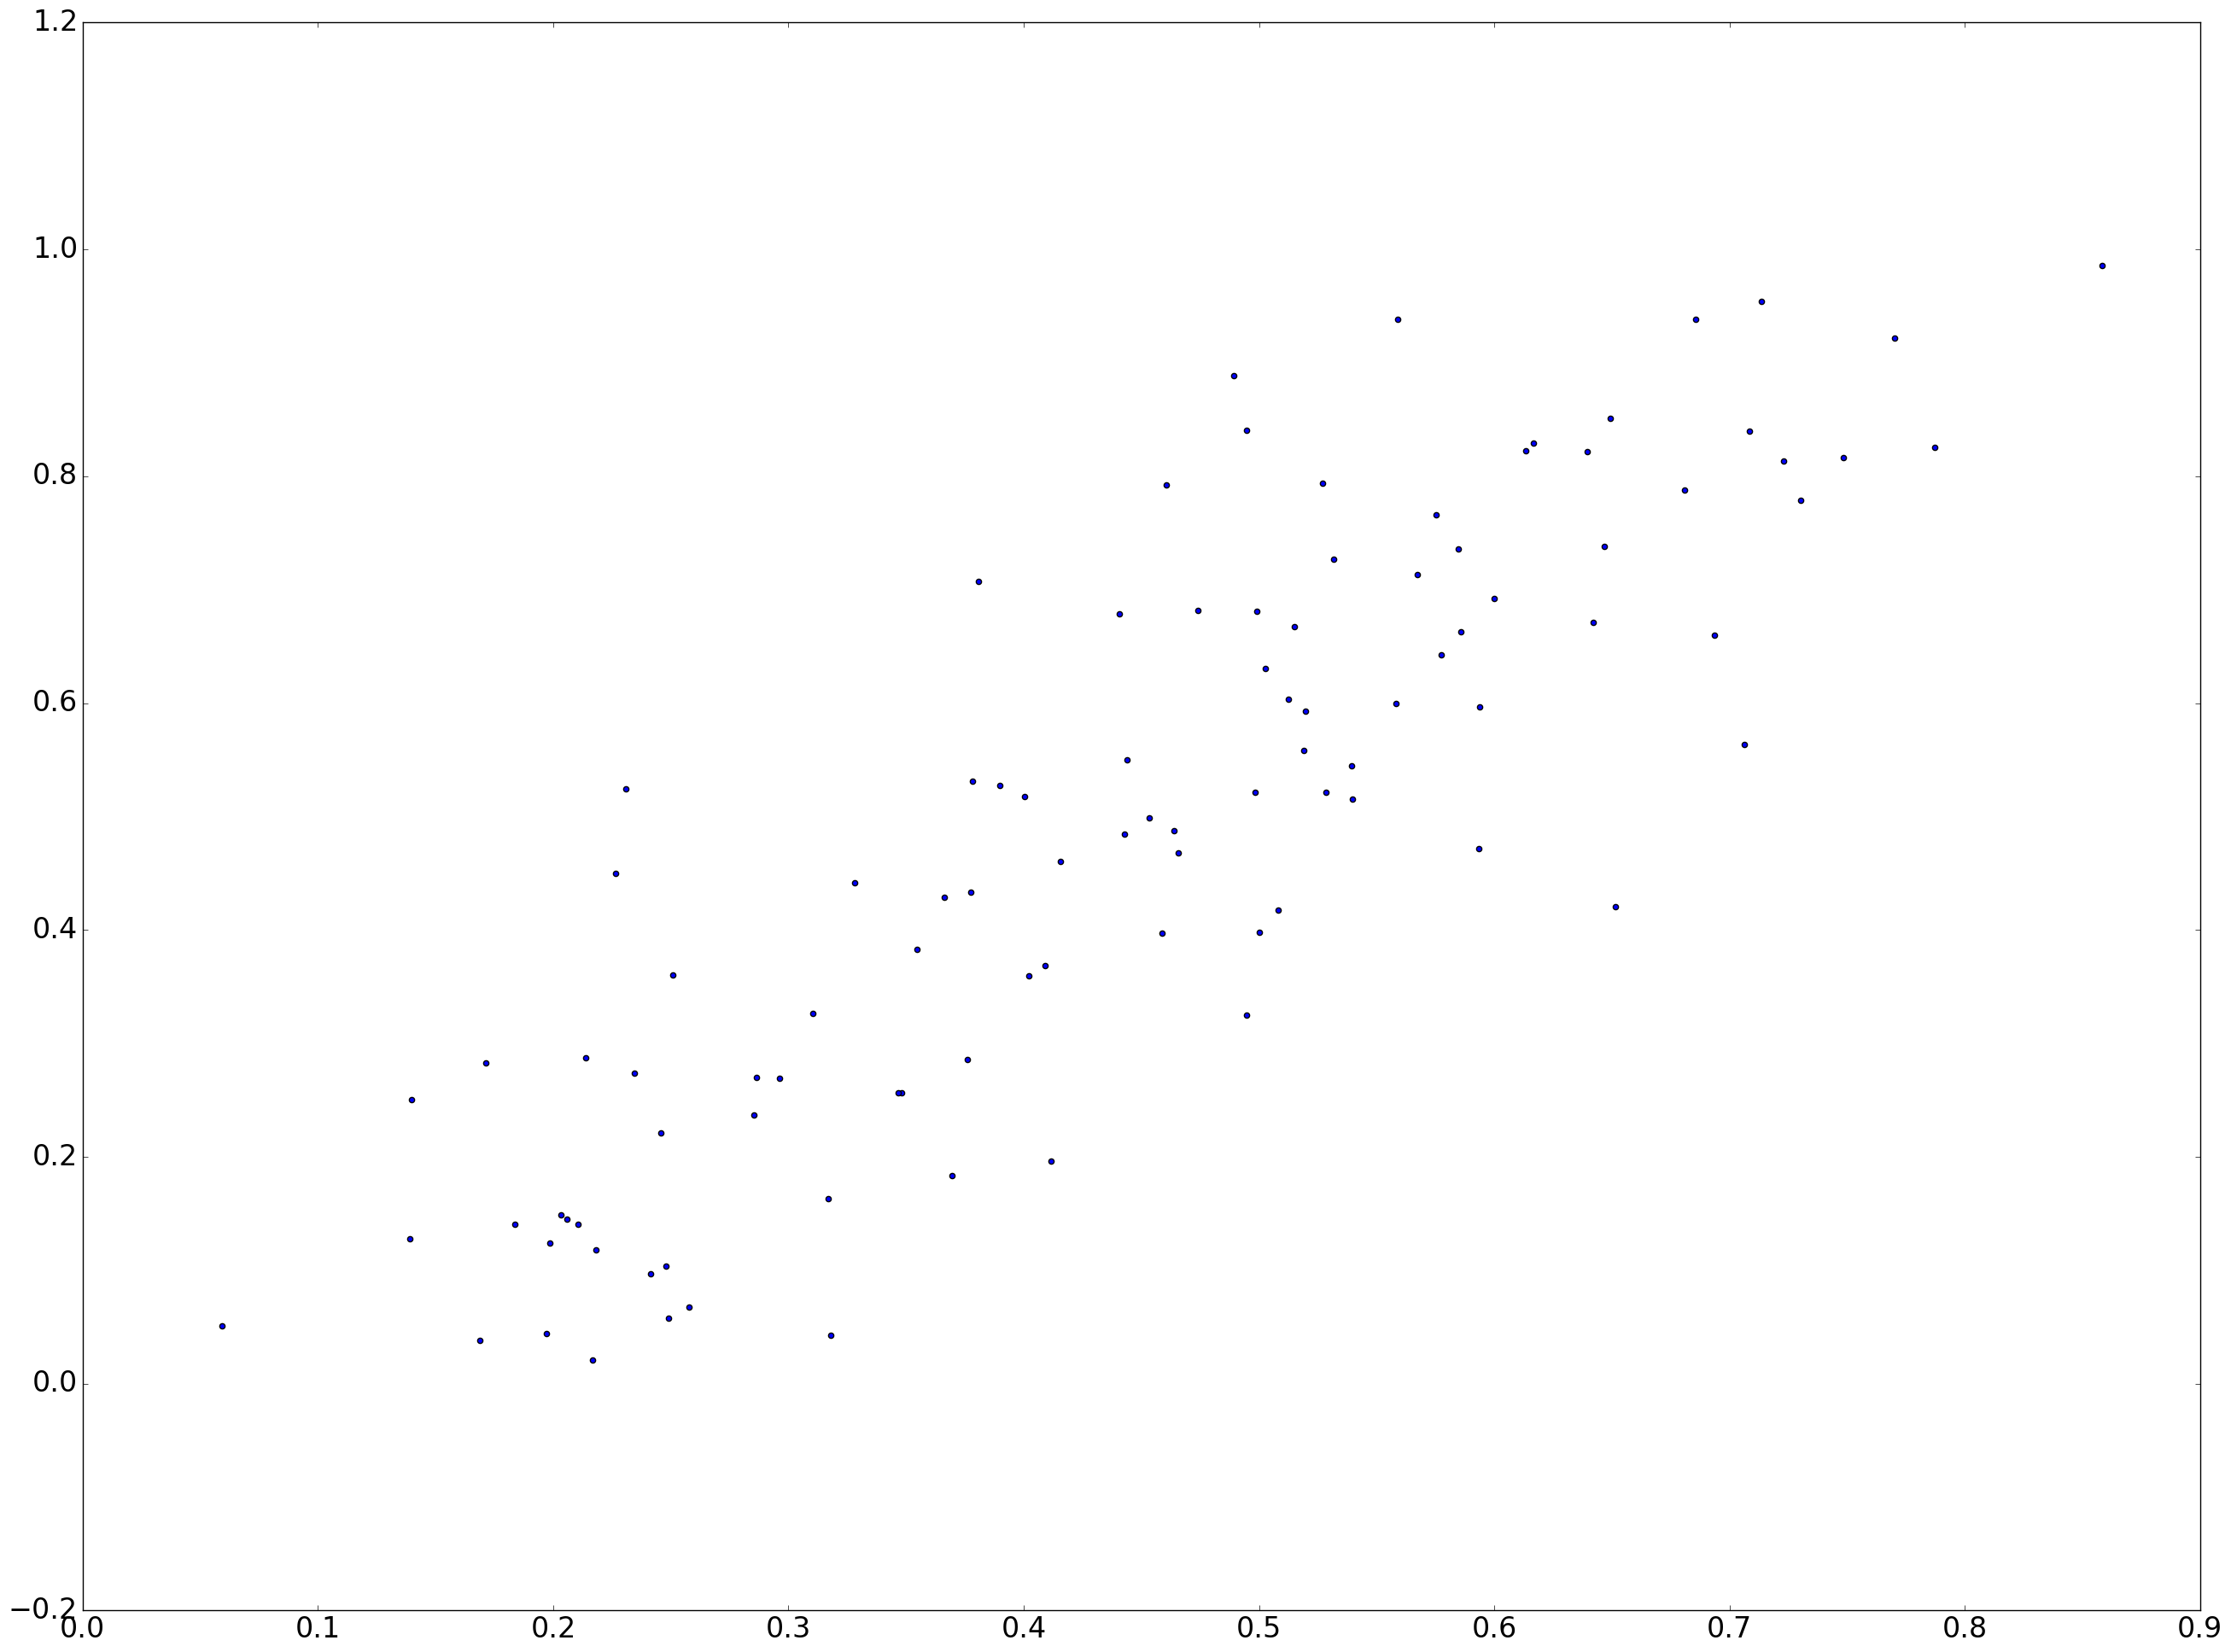

In [5]:
def genFunc(m, c, n):    
    x = np.random.rand(n)
    e = 0.1 * np.random.randn(n)
    y = np.array(c + m*x + e)
    return y,x

a,b = genFunc(0.5, 0.2, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a,b)


## 3. Least squares - Matrix Form ##
Using the sequences ${y_i}$ and ${x_i}$ from **Q2**, implement the matrix form of the method of least squares to determine estimates of the parameters $a$ and $b$ assuming that $y_i=a+bx_i+e_i$.

In [48]:
## als = (XtX)^-1 XtY 

x,y = genFunc(0.5, 0.2, 100)

Y = np.array(y).reshape(1, 1)
X = np.arange(200.0).reshape(100, 2)
X[:,0] = 1
for i in range(0, x.size):
    X[i][1] = x[i]
##print(X)
print(Y)


[ 0.3234786   0.94706492  0.47702673  0.90663452  0.44651851  0.93418665
  0.89803778  0.6057523   0.76014779  0.44043287  0.92212788  0.20806489
  0.67913963  0.27624027  0.21484397  0.73861017  0.21399072  0.52197123
  0.5873456   0.49488265  0.54807497  0.7952759   0.40792046  0.69759278
  0.77145291  0.18355206  0.09846775  0.47993873  0.76191337  0.6537399
  0.78835708  0.16034635  0.8351731   0.4250858   0.16534685  0.9547308
  0.25594312  0.41667583  0.06214282  0.48900166  0.64277005  0.85657605
  0.03945829  0.917926    0.83213045  0.76710788  0.21301255  0.55250197
  0.75137521  0.32099279  0.72821279  0.23866875  0.41146805  0.41064432
  0.39002831  0.27716693  0.56890542  0.11352983  0.95439189  0.73259695
  0.86417385  0.79838264  0.05380657  0.62240825  0.75087447  0.78274311
  0.48405372  0.28141437  0.34070217  0.81397825  0.94049168  0.93597316
  0.89715302  0.74170214  0.61650893  0.14280559  0.64243419  0.02076662
  0.81387293  0.94026247  0.74610037  0.04586819  0.4

### Discuss: ### 
<font color="blue">what is the effect of changing the mean and the standard deviation of ei on the
estimated values of m and c
</font>

## 4. Line fitting ##

Draw the line defined by the estimated values of $a$ and $b$ on top of the scatter plot generated in **Q2**. Note: do not use any pre-defined functions. Write your own code to plot the line.

## 5. Outliers ##
Add a few outliers to your data. For example, add the points {(0.5, 5), (0.6, 5), (0.7, 5)} to the sampled sequences from Q2.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).

![Line fit](lineFit.jpg)

### Discuss ###

<font color="blue">what is the effect of outliers on the best line estimate?</font>

## 6. Choosing your Model ##

### 6.1. Loading your data ###

Load the data in the file DMD.csv where the first column is $x_i$ and the second column is $y_i$.

Generate a scatter plot of $(x_i, y_i)$.

### 6.2. Deciding on the Model's Complexity ###

Assuming a polynomial relationship between $x_i$ and $y_i$, what would you suggest as a suitable complexity for the model? Write your modelâ€™s equation.

### Discuss ###

<font color="blue">for the model youâ€™ve chosen, what are the parameters of the model?</font>

### 6.2. Calculating the Model's Parameters ###

Adjust the code in Q3 if needed to calculate the parameters of your chosen model for this data.

### Discuss ###
<font color="blue">what would X and y in the least squares solution be?</font>

Plot your best fitting polynomail from Q8.

### 6.3. Generalisation and Overfitting ###

What would the model be if you generalise it further?

What would the model be if you attempt to overfit the training data?

### Discuss ###

<font color="blue">write down your answers for Q10 and Q11 and discuss your written explanation
with a TA</font>